In [48]:
#Firstly importing libraries

# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.model_selection import train_test_split

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('loan_data.csv')
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<AxesSubplot:>

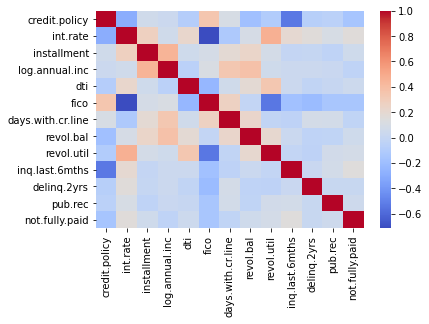

In [4]:
sns.heatmap(df[['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']].corr(), fmt = '.2f', cmap = 'coolwarm')

In [5]:
# Checking for null(empty) values
df.isnull().sum().sort_values(ascending = False)

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
# Removing outliers of a numerical feature
# In this case the average glucose Level

def outliers(df, ft):
        Q1 = df[ft].quantile(0.25)
        Q3 = df[ft].quantile(0.75)
        IQR = Q3 - Q1
    
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q1 + 2 * IQR
    
        ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    
        return ls

In [7]:
index_list = []
for feature in ['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']:
    index_list.extend(outliers(df, feature))

In [8]:
index_list

[375,
 1544,
 1565,
 2119,
 2233,
 2321,
 2362,
 2364,
 2696,
 2945,
 3552,
 3602,
 3644,
 3647,
 3655,
 3658,
 3678,
 3713,
 3718,
 3736,
 3789,
 3991,
 4019,
 4030,
 4064,
 4309,
 4372,
 4441,
 4460,
 4479,
 4521,
 4647,
 4668,
 4694,
 4731,
 4761,
 4820,
 4841,
 4901,
 4958,
 5077,
 5093,
 5135,
 5182,
 5252,
 5274,
 5325,
 5336,
 5363,
 5364,
 5479,
 5540,
 5596,
 5647,
 5679,
 5717,
 5839,
 5868,
 6057,
 6064,
 6080,
 6098,
 6172,
 6202,
 6212,
 6284,
 6335,
 6341,
 6357,
 6422,
 6432,
 6467,
 6517,
 6528,
 6661,
 6721,
 6771,
 6848,
 6897,
 6902,
 6949,
 7007,
 7163,
 7164,
 7313,
 7361,
 7402,
 7424,
 7527,
 7608,
 7614,
 7687,
 7702,
 7806,
 7848,
 7857,
 7874,
 7876,
 7957,
 8003,
 8052,
 8070,
 8139,
 8160,
 8182,
 8193,
 8194,
 8200,
 8204,
 8208,
 8213,
 8226,
 8235,
 8247,
 8248,
 8250,
 8251,
 8260,
 8265,
 8283,
 8297,
 8328,
 8331,
 8332,
 8349,
 8378,
 8385,
 8387,
 8391,
 8405,
 8419,
 8423,
 8424,
 8431,
 8447,
 8469,
 8508,
 8520,
 8522,
 8530,
 8548,
 8553,
 8560,


In [9]:
df.shape

(9578, 14)

In [10]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [11]:
df_cleaned = remove(df, index_list)

In [12]:
df_cleaned.shape

(7219, 14)

In [13]:
df_cleaned.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [14]:
# One Hot Encoding
purpose = pd.get_dummies(df_cleaned.purpose)
df_cleaned = pd.concat([df,purpose], axis='columns')

# Dropping unused features
df_cleaned = df_cleaned.drop(['purpose'],axis = 1)

In [15]:
df_cleaned.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_cleaned.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business'],
      dtype='object')

In [22]:
df_cleaned = df_cleaned.dropna()

In [23]:
df_cleaned.shape

(7219, 20)

In [24]:
df_cleaned.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:

# Setting up features for the training/testing model
X = df_cleaned[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business']]
y = df_cleaned['not.fully.paid']

# Implemeting newly created variables ^^^
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3)

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

84.03

In [44]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

82.09

In [43]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

84.03

In [49]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

84.16

In [50]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussian

81.53

In [51]:

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
acc_perceptron

58.36

In [52]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
acc_linear_svc

c:\users\sibis\anaconda3\envs\lrmodel\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


83.01

In [53]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

73.96

In [54]:

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.850 total time=   3.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.850 total time=   3.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.850 total time=   3.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.850 total time=   3.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.850 total time=   3.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   3.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   3.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   3.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   3.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   3.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.850 total time=   3.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.850 total time=   3.4s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.850 total time=   3.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.850 total time=   3.9s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.850 total time=   4.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.850 total time=   3.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.850 total time=   3.6s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.850 total time=   3.4s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.850 total time=   3.3s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.850 total time=   3.4s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.850 total time=   3.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.850 total time=   3.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.850 total time=   3.4s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [55]:

print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best estimator:  SVC(C=0.1, gamma=1)


In [56]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

84.16